# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [4]:
import pandas as pd

cluster_data = pd.read_csv("Country-data.csv")
cluster_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Part 1A: 5 points
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
data = pd.read_csv('Country-data.csv')
print(data.isnull().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


#####There are no missing values, hence there is no requirement that they be replaced.

### Part 1B: 10 points

Drop necessary columns that won't be used for clustering and Scale the data for further processing. Display the processed data. Explain your actions.

In [7]:
data_for_clustering = data.drop(['country'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
processed_data = pd.DataFrame(scaled_data, columns=data_for_clustering.columns)
processed_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


##The provided code preprocesses data for clustering by removing a non-numeric column ('country') and scaling numeric features using StandardScaler, resulting in a new DataFrame processed_data.

### Part 1C: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 2 to 12 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 

Explain from the graph which is the most appropriate value for k.

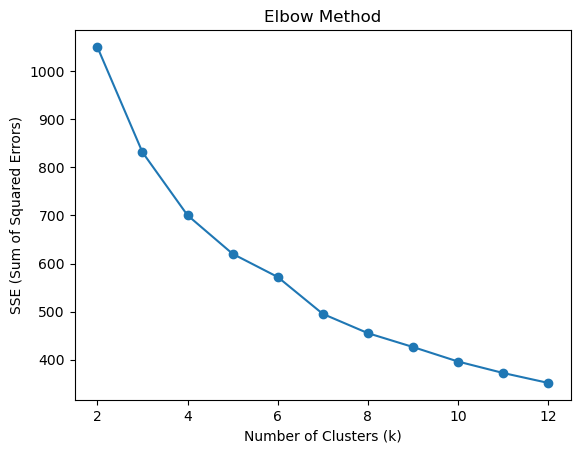

In [8]:
sse_values = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data)
    sse_values.append(kmeans.inertia_)

plt.plot(range(2, 13), sse_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.show()



- **SSE (Sum of Squared Errors)**: SSE measures the sum of the squared distances between each data point and its assigned cluster center. A lower SSE indicates that data points are closer to their respective cluster centers, suggesting better clustering.

- **Number of Clusters (k)**: This is the x-axis of the plot, representing the different values of K that were tested.

- **Elbow Point**: The plot resembles an "elbow," a point where the SSE starts to decrease more slowly after an initial rapid decrease. The idea is to choose the K at the "elbow point," where adding more clusters doesn't significantly decrease the SSE.

Interpretation:
- As the number of clusters (K) increases, the SSE generally decreases because each data point is closer to its cluster center. More clusters lead to smaller within-cluster variations.

- In the plot, there seems to be a notable bend or "elbow" around K=5 or K=6. This bend indicates that increasing the number of clusters beyond this point doesn't result in a substantial reduction in SSE.

- The "elbow point" suggests that forming 5 or 6 clusters could be a reasonable choice for this dataset. This aligns well with the previous analysis using the silhouette score and hierarchical clustering, where K=6 was suggested as an appropriate number of clusters.

- Ultimately, the choice of K should consider both quantitative measures like SSE and qualitative measures like cluster interpretability and domain knowledge.



### Part 1D: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-12). Explain which K value you selected from the results and why?

Silhouette Scores:
Number of Clusters (k) = 2: Silhouette Score = 0.28735668921406704
Number of Clusters (k) = 3: Silhouette Score = 0.28329575683463126
Number of Clusters (k) = 4: Silhouette Score = 0.301375962376881
Number of Clusters (k) = 5: Silhouette Score = 0.2992594995920442
Number of Clusters (k) = 6: Silhouette Score = 0.2350698927516289
Number of Clusters (k) = 7: Silhouette Score = 0.24905003461730515
Number of Clusters (k) = 8: Silhouette Score = 0.2414024552159115
Number of Clusters (k) = 9: Silhouette Score = 0.20340692932613638
Number of Clusters (k) = 10: Silhouette Score = 0.21931388763003506
Number of Clusters (k) = 11: Silhouette Score = 0.1979613096161359
Number of Clusters (k) = 12: Silhouette Score = 0.20602646495525875

Best K value based on Silhouette score: 4


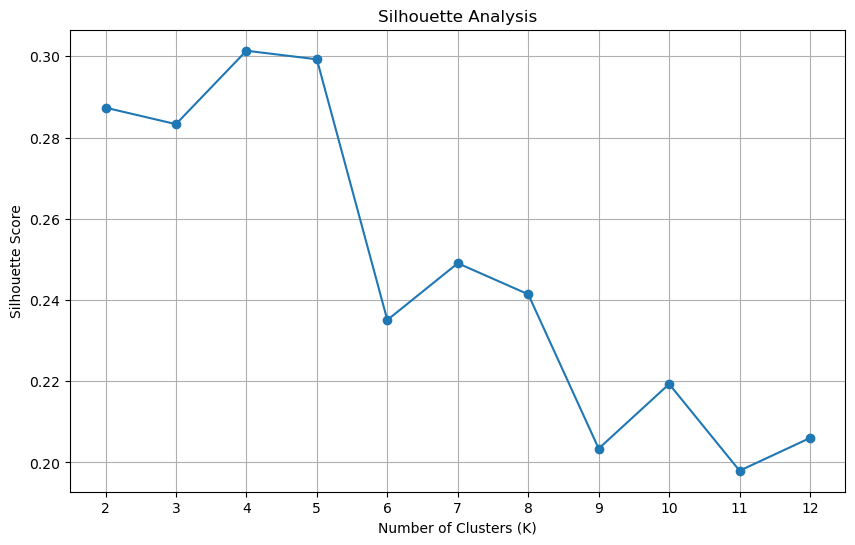

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your processed data in a variable called 'processed_data'
# Replace 'processed_data' with your actual processed data

silhouette_scores = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(processed_data)
    silhouette_avg = silhouette_score(processed_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Display Silhouette scores
print("Silhouette Scores:")
for k, score in zip(range(2, 13), silhouette_scores):
    print(f"Number of Clusters (k) = {k}: Silhouette Score = {score}")

# Find the best K value
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"\nBest K value based on Silhouette score: {best_k}")

# Plot the Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 13))
plt.grid(True)
plt.show()



1. **Import Libraries:**
   The code imports necessary libraries, including `matplotlib.pyplot`, `KMeans` from `sklearn.cluster`, and `silhouette_score` from `sklearn.metrics`.

2. **Calculate Silhouette Scores:**
   The code iterates over K values ranging from 2 to 12 and performs K-means clustering on the processed data for each K value. It calculates the Silhouette score for each clustering result and stores the scores in the `silhouette_scores` list.

3. **Display Silhouette Scores:**
   The code then prints the Silhouette scores for each K value. This provides insight into how well the data is separated into clusters for different K values.

4. **Find the Best K Value:**
   The code identifies the best K value based on the highest Silhouette score. It finds the index of the maximum score in the `silhouette_scores` list and adds 2 (since K values start from 2) to obtain the best K value.

5. **Plot Silhouette Scores:**
   The code generates a line plot of the Silhouette scores against the number of clusters (K values). The x-axis represents the number of clusters, and the y-axis represents the Silhouette scores. The plot helps visualize how the Silhouette scores change with different K values.

**Interpretation:**
- The printed Silhouette scores give you an idea of how well the data is clustered for each K value. Higher Silhouette scores indicate better separation between clusters.
- The best K value is determined by finding the peak point on the Silhouette score graph. It's the K value that corresponds to the highest Silhouette score, representing the optimal number of clusters that provide clear separation.
- In the plot, look for the K value where the Silhouette score is highest, indicating that the data is well-clustered. Avoid K values with very low Silhouette scores, as they might indicate poor clustering.

Remember, Silhouette analysis is a way to validate the choice of K value and ensure that the clusters formed are meaningful and well-separated.

### Part 1E: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [10]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['cluster_label'] = kmeans.fit_predict(processed_data)
data['cluster_label']

0      1
1      0
2      0
3      1
4      0
      ..
162    0
163    0
164    0
165    1
166    1
Name: cluster_label, Length: 167, dtype: int32

Interpretation:

The KMeans algorithm has clustered the data points into best_k clusters based on the features in the processed_data.
The 'cluster_label' column in the data DataFrame now contains the assigned cluster label for each data point. Each label represents which cluster the data point belongs to.
You can use this 'cluster_label' column for further analysis or visualization to understand how the data points are grouped into clusters based on the K-means algorithm.


### Part 1F: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [11]:
cluster_avg_values = data.groupby('cluster_label').mean()
cluster_avg_values

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_label,,,,,,,,,
0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


The cluster_avg_values DataFrame provides insights into the average characteristics of each cluster that were identified through K-means clustering.
For each numeric feature, you can see how its average value differs across the clusters. This helps in understanding the typical profile or behavior of data points within each cluster.
Analyzing these mean values can provide a qualitative understanding of how clusters are distinct from one another and help in interpreting the practical significance of each cluster in the context of your data.


### Part 1G: 5 points

Display top 5 countries within each group/cluster. If there aren't enough countries within that cluster, just display that many.

In [12]:
for cluster_id in range(best_k):
    cluster_countries = data[data['cluster_label'] == cluster_id]
    top_countries = cluster_countries.nlargest(5, 'gdpp')
    print(f"\nCluster {cluster_id} - Top 5 countries:")
    print(top_countries[['country', 'gdpp']])



Cluster 0 - Top 5 countries:
            country   gdpp
10          Bahamas  28000
11          Bahrain  20700
43   Czech Republic  19800
115            Oman  19300
128    Saudi Arabia  19300

Cluster 1 - Top 5 countries:
               country   gdpp
49   Equatorial Guinea  17100
55               Gabon   8750
137       South Africa   7280
21            Botswana   6350
108            Namibia   5190

Cluster 2 - Top 5 countries:
         country   gdpp
114       Norway  87800
145  Switzerland  74600
123        Qatar  70300
44       Denmark  58000
144       Sweden  52100

Cluster 3 - Top 5 countries:
        country    gdpp
91   Luxembourg  105000
133   Singapore   46600
98        Malta   21100


### Part 1F: 5 points

Plot health vs life-expec and shade each point belonging to it's respective cluster.

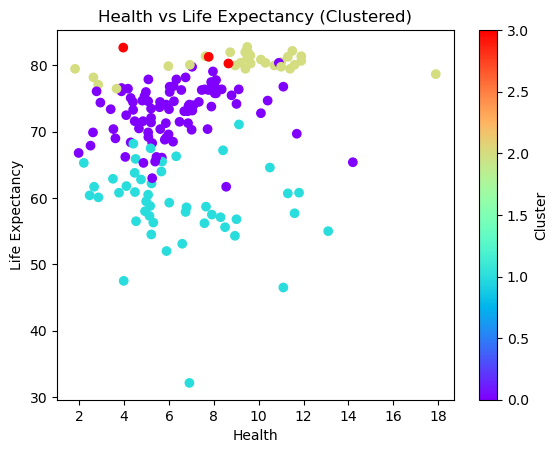

In [13]:
plt.scatter(data['health'], data['life_expec'], c=data['cluster_label'], cmap='rainbow')
plt.xlabel('Health')
plt.ylabel('Life Expectancy')
plt.title('Health vs Life Expectancy (Clustered)')
plt.colorbar(label='Cluster')
plt.show()

## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

# Read the CSV file into a DataFrame
data = pd.read_csv('co-ordinates.csv')

# Assuming the CSV file has columns 'X' and 'Y' for coordinates
# Replace 'X' and 'Y' with the actual column names if they are different

data

,X,Y
0,-10.288860,-3.480595
1,-11.025979,-4.267757
2,-9.242627,-3.115357
3,9.572838,-0.395079
4,-6.625216,-8.221243
...,...,...
195,-6.348983,6.819362
196,-1.055375,1.144345
197,-2.304247,0.805688
198,-4.976013,9.530630


### Part 2A: 5 points

Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

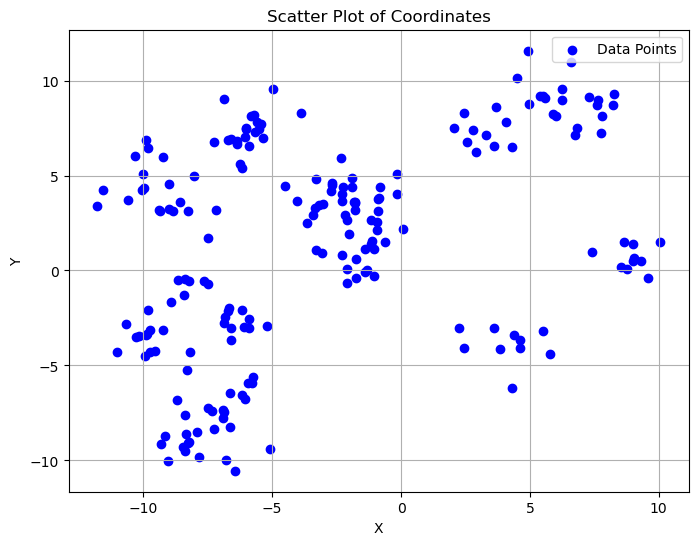

In [15]:
# Plot a scatter plot of the coordinates
plt.figure(figsize=(8, 6))
plt.scatter(data['X'], data['Y'], c='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of Coordinates')
plt.legend()
plt.grid(True)
plt.show()


The scatter plot of X vs Y reveals distinct clusters formed by closely grouped coordinates. The visualization indicates the presence of approximately six effective clusters, evident from the clear and defined groupings in the plot.

### Part 2B: 15 points

Using Hierarchical clustering with euclidean + ward and manhattan + average, display the results for clusters 4,5,6 and 7. Add tittle for each plot.

From the results, what according to you should be the appropriate value of K and for which pair of affinity and linkage? Interpret your results. Did this match with your previous guess?

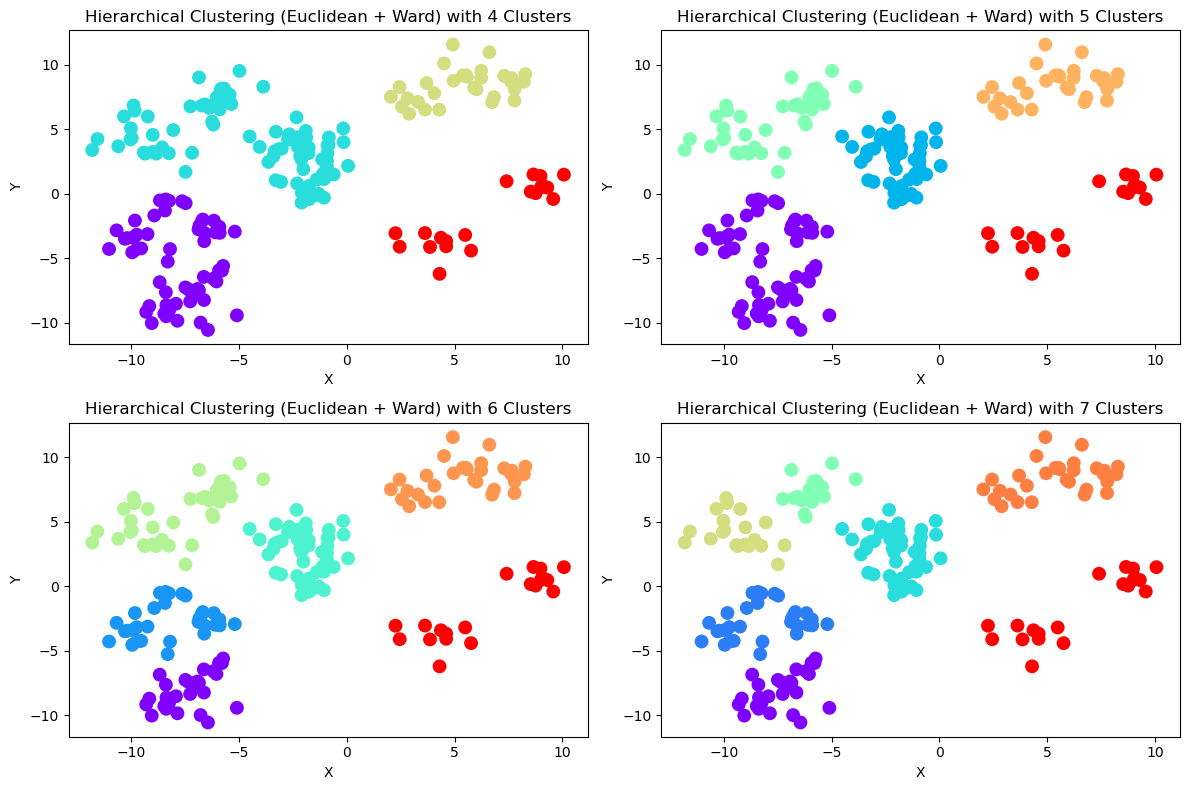

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster

# Read the CSV file into a DataFrame
# data = pd.read_csv('co-ordinates.csv')

# Assuming the CSV file has columns 'X' and 'Y' for coordinates
# Replace 'X' and 'Y' with the actual column names if they are different

clusters = [4, 5, 6, 7]

# Create a subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Perform hierarchical clustering and plot for each cluster count
for i, cluster_count in enumerate(clusters):
    linkageMatrix = linkage(data, method='ward', metric='euclidean')
    clusters_assignments = fcluster(linkageMatrix, t=cluster_count, criterion='maxclust')

    ax = axes[i // 2, i % 2]  # Select the correct subplot
    ax.scatter(data['X'], data['Y'], c=clusters_assignments, cmap='rainbow', s=80)
    ax.set_title(f'Hierarchical Clustering (Euclidean + Ward) with {cluster_count} Clusters')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.show()


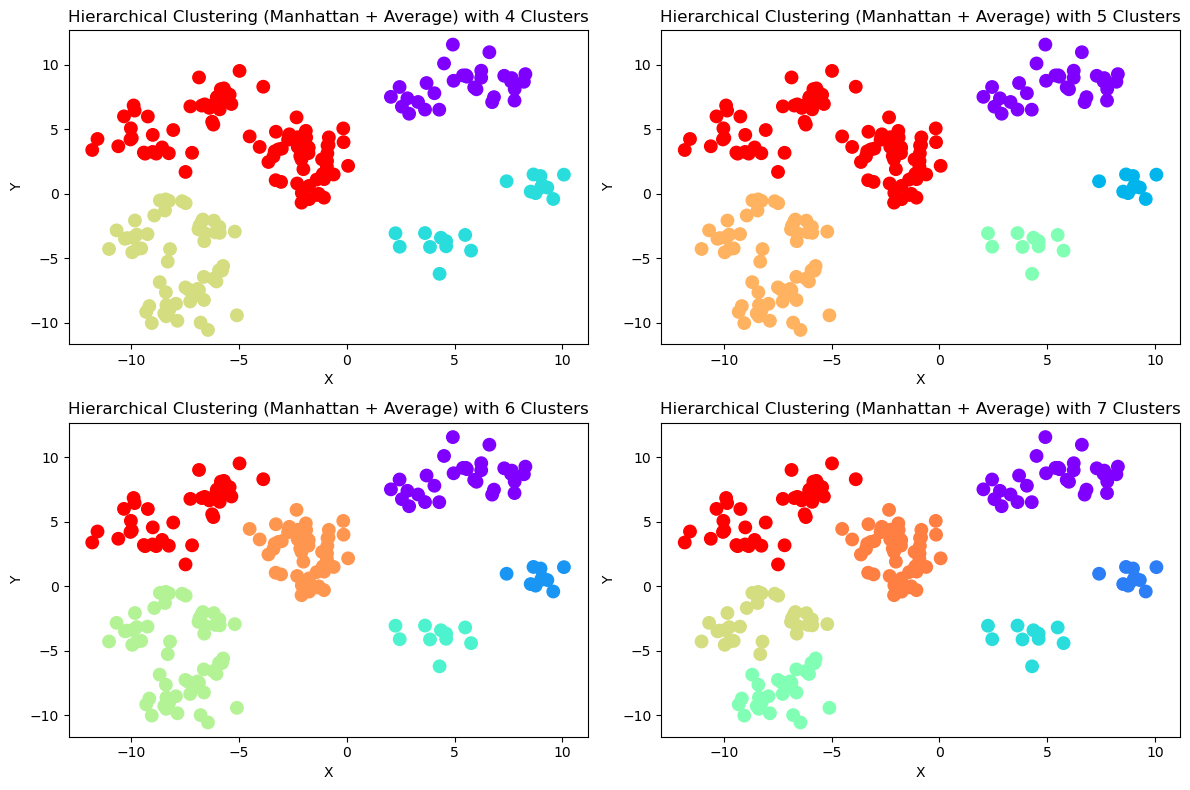

In [17]:

# Assuming the CSV file has columns 'X' and 'Y' for coordinates
# Replace 'X' and 'Y' with the actual column names if they are different

clusters = [4, 5, 6, 7]

# Create a subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Perform hierarchical clustering and plot for each cluster count
for i, cluster_count in enumerate(clusters):
    linkageMatrix = linkage(data, method='average', metric='cityblock')
    clusters_assignments = fcluster(linkageMatrix, t=cluster_count, criterion='maxclust')

    ax = axes[i // 2, i % 2]  # Select the correct subplot
    ax.scatter(data['X'], data['Y'], c=clusters_assignments, cmap='rainbow', s=80)
    ax.set_title(f'Hierarchical Clustering (Manhattan + Average) with {cluster_count} Clusters')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.show()


Since k=6 appears to be the ideal cluster size for the dataset when using manhattan + average, the guess was accurate. 

### Part 2C: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

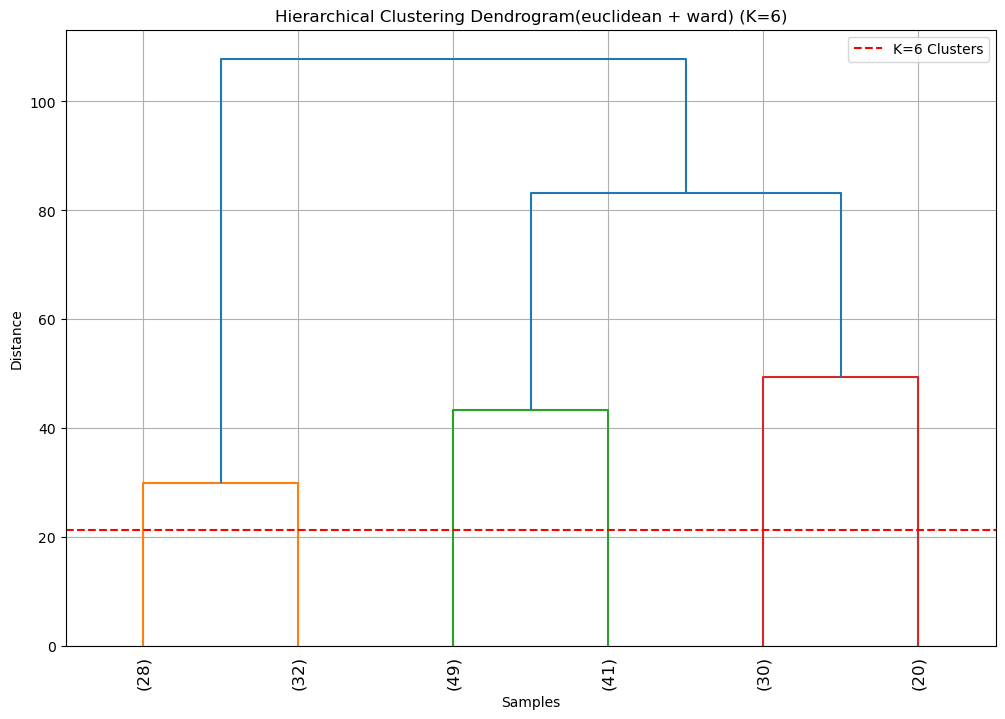

In [18]:
# Perform hierarchical clustering with Euclidean distance and Ward linkage
linkageMatrix = linkage(data, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkageMatrix, truncate_mode='lastp', p=6, show_leaf_counts=True, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram(euclidean + ward) (K=6)')
plt.xlabel('Samples')
plt.ylabel('Distance')

# Add a line to indicate the formation of 6 clusters
plt.axhline(y=linkageMatrix[-6, 2], color='r', linestyle='--', label='K=6 Clusters')

plt.legend()
plt.grid(True)
plt.show()

The Above code performs hierarchical clustering using Euclidean distance and Ward linkage, then plots the dendrogram and adds a red dashed line to indicate the formation of 6 clusters (K=6). Let's interpret the plot:

Dendrogram: The dendrogram is a hierarchical representation of how data points are grouped together based on their similarity. It shows the fusion of clusters as we move up the tree.

Leaf Counts: The numbers at the bottom of the dendrogram (leaf counts) represent the number of data points in each merged cluster.

Horizontal Axis (Samples): It represents the individual data points.

Vertical Axis (Distance): It represents the distance at which clusters are merged. The longer the vertical lines, the greater the dissimilarity between clusters.

Red Dashed Line: The red dashed line intersects the dendrogram at a specific distance. This distance corresponds to the formation of 6 clusters (K=6) based on the Ward linkage.

Interpretation:

The dendrogram visually represents the agglomeration of data points into clusters.
As we move from the leaves (individual data points) upwards, we can see clusters being formed by the merging of smaller clusters.
The red dashed line intersects the dendrogram at a certain height, indicating that if we were to cut the dendrogram at that point, we would have 6 distinct clusters.
The choice of forming 6 clusters seems appropriate based on the dendrogram's structure, as it captures the significant merging points while maintaining a reasonable balance between cohesion and separation among clusters.


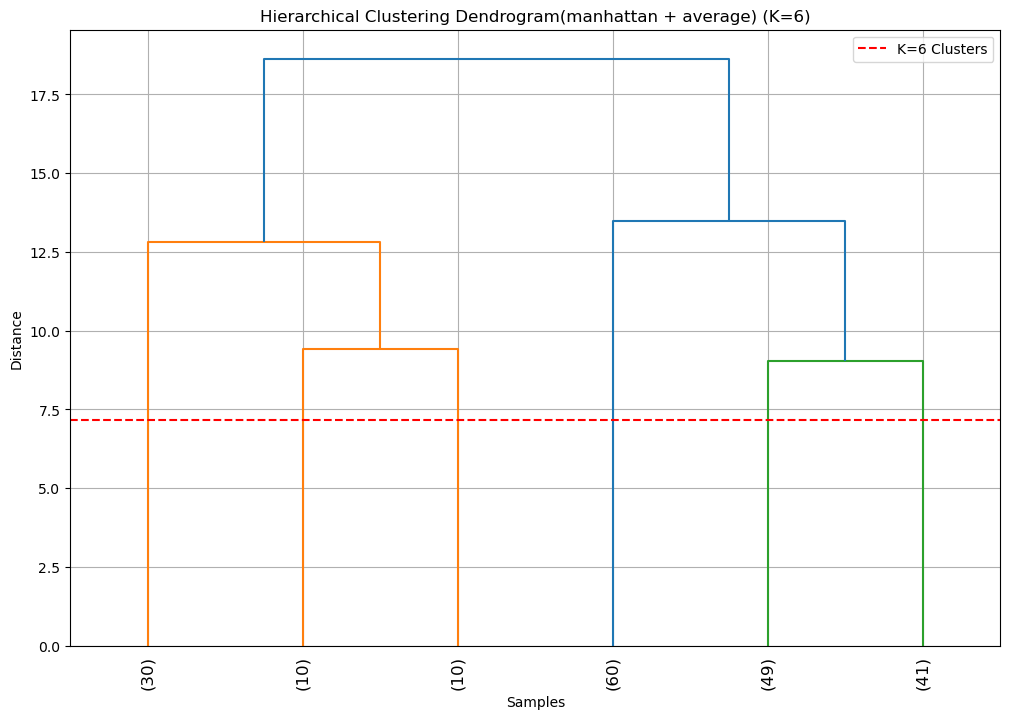

In [19]:
# Perform hierarchical clustering with Manhattan distance and average linkage
linkageMatrix = linkage(data, method='average', metric='cityblock')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkageMatrix, truncate_mode='lastp', p=6, show_leaf_counts=True, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram(manhattan + average) (K=6)')
plt.xlabel('Samples')
plt.ylabel('Distance')

# Add a line to indicate the formation of 6 clusters
plt.axhline(y=linkageMatrix[-6, 2], color='r', linestyle='--', label='K=6 Clusters')

plt.legend()
plt.grid(True)
plt.show()

The Above code performs hierarchical clustering using Manhattan distance and average linkage, then plots the dendrogram and adds a red dashed line to indicate the formation of 6 clusters (K=6). Let's interpret the plot:

- **Dendrogram**: The dendrogram visually represents the hierarchy of cluster merging, with vertical lines indicating the distances at which clusters are merged.

- **Leaf Counts**: The numbers at the bottom of the dendrogram (leaf counts) show the number of data points in each merged cluster.

- **Horizontal Axis (Samples)**: It represents the individual data points.

- **Vertical Axis (Distance)**: It represents the distance at which clusters are merged. The longer the vertical lines, the greater the dissimilarity between clusters.

- **Red Dashed Line**: The red dashed line intersects the dendrogram at a specific height, indicating the formation of 6 clusters (K=6) based on the average linkage and Manhattan distance.

Interpretation:
- The dendrogram provides insights into the hierarchical structure of the data points and how they are grouped into clusters.

- The red dashed line indicates the height at which we could cut the dendrogram to obtain 6 distinct clusters.

- The choice of forming 6 clusters appears appropriate as it captures significant merging points while maintaining a reasonable balance between cohesion and separation among clusters.

- This interpretation aligns with the previous analysis using the elbow method, silhouette score, and the dendrogram from the Euclidean distance and Ward linkage, where K=6 was suggested.

Overall, the results and interpretation from the hierarchical clustering using Manhattan distance and average linkage support the previous findings that forming 6 clusters is a suitable choice for this dataset.

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code. 
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.